# Mystery Filter: Characterizing Filters

### EE 16B: Designing Information Devices and Systems II, Spring 2017

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-


##Table of Contents


* [Introduction](#intro)
* [Task 1: Resistor Value](#task1)
* [Task 2: Capacitor Value](#task2)
* [Task 3: Switching the Filter](#task3)

<a id='intro'></a>
## Introduction

In this lab you are given a capacitor and a resistor of unknown value. You will find the values of these mystery components, and learn about how resistor and capacitors in combination can be used to filter out high or low frequencies.

<a id='task1'></a>
## <span style="color:blue">Task 1: Resistor Value</span>

### Materials
- Mystery resistor
- 1 K$\Omega$ resistor
- 100 K$\Omega$ resistor
- Power supply
- Digital Multimeter

There are many intruments at your desk that can be used to find the value of the mystery resistor. The quickest of which is the Digital Multimeter(DMM), which has an ohm-meter setting. You will use this in just a few minutes, but first, you will build your own ohm-meter. 

The way that ohm-meters usually work is by putting a small current through a resistor and measuring the voltage drop. However, it is difficult for you to create a small and controlled current at your bench, so instead, you will use a different mechanism to find the value of the mystery resistor.

You already know how to choose a ratio of resistors to create a known output voltage with a voltage divider. Rather than solving for the output voltage that you want, you can measure the voltage dropped across the known resistor and use that to solve for the resistor ratio that created it.

<img style="width: 250px" src="co-res-divider.png">

Let's recall the voltage divider equation:
$$V_{out} = V_{in} \frac{R_2}{R_1 + R_2}$$

For this circuit, $R_1 = R_{known}$ and $R_2 = R_{mystery}$.

Build the above voltage divider with the 1 K$\Omega$ resistor, and your mystery resistor, and use the power supply to set $V_{in}$ at 3V. <i>Remember to connect $R_{mystery}$ to ground!</i>

Now, use your DMM to measure the voltage at $V_{out}$. If the voltage you measure at the output is very close to 3V or 0V then the ratio between the known resistor and the mystery resistor is skewed very far. (If $R_2 >> R1$, how can we simplify the voltage divider equation?) This can make it difficult to get an accurate value for your mystery resistor. If your output is very close to 0V then you should use a smaller resistor than 1 K$\Omega$, and if your output is very close to 3V then switch 1 K$\Omega$ with a larger resistor.

Now, use the cells below to calculate the value of $R_{mystery}$ using the value you've measured for $V_{out}$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Solve for R_myst from Voltage Divider Eqn

v_out = 1.998
r_known = 1000
R_myst = v_out*r_known/3/(1 - v_out/3)

print(R_myst)

1994.0119760479045


**<span style="color:red">What is the value of your resistor?</span>**
1994.0119760479045 ohms
~2 kilo-ohms


To double check, switch the DMM mode to $\Omega$ and check the value you solved for with the voltage divider. Make sure you are using the right ports on the DMM. Do the values match?

<a id='task2'></a>
## <span style="color:blue">Task 2: Capacitor Value</span>

### Materials
- Mystery Capacitor
- Mystery Resistor
- Oscilloscope
- Power Supply

To measure the value of the capacitor, we can use a similar circuit to the voltage divider. However, recall that capacitors can act like very small or very large resistors depending on the frequency of the input. This means will have to look at the value over several frequencies to get a good estimation of the capacitor value.

Let us begin by intuitively examining the capacitor in the voltage divider.

<img style="width: 250px" src="co-low-pass-filt.png">

Recall that, if one component's impedence is much larger than the other, then almost all of the voltage is dropped across that larger component. So, if the top component is the large one, then the output voltage will be very small. If the bottom component is large, then the output voltage will be very large. 

Now, lets think about capacitors. Capacitors let high frequency signals pass through, but stop low frequency signals. So, at high frequencies capacitors act like a small impedance, and at low frequencies capacitors act like a large impedance.


**<span style="color:red">If the voltage source $V_{src}$ is very a low frequency, will $V_o$ be large or small?</span>**

large

**<span style="color:red">If the voltage source $V_{src}$ is very a high frequency, will $V_o$ be large or small?</span>**

small

You will now test your prediction, and examine the change in amplitude of the output voltage at high and low frequencies. Use your function generator as your voltage source and your oscilloscope to measure the amplitude of the output signal. <i> Remember to connect all the grounds of the circuit together! </i> Set the following parameters on the function generator:
- Amplitude: 3 Vpp
- DC Offset: 0 V
- Frequency: the galues in `freq` below
- Output Mode: High Z

Test at each frequency in array `freq`, and record your results in `Amplitude`. 

In [7]:
3*.707

2.121

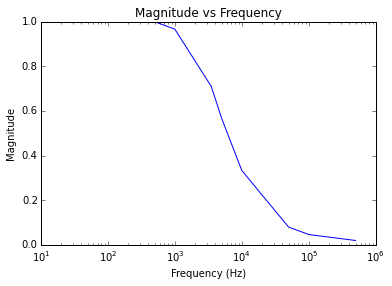

In [9]:
#Record the amplitude of the output sinusoid at each given frequency
Vsrc = 3

freq = [10, 50, 100, 500, 1e3, 3.5e3, 5e3, 10e3, 50e3, 100e3, 500e3]
Amplitude = [3, 3, 3, 3, 2.9, 2.13, 1.7, 1, .24, .14, .06]

Gain = np.array(Amplitude)/Vsrc


p = plt.semilogx(freq, Gain)
plt.title('Magnitude vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

Let's look at the graph we just made. Notice that it graphs frequency on a log axis, and the Y axis is voltage gain. This is similar to other more common ways of plotting frequency response, known as a Bode plot, but we will not go into those now.

You will notice in your graph that the amplitude is relatively constant in low frequencies, but drops suddenly at high frequencies. This kind of resistor capacitor combination is referred to as a **Low Pass Filter**. It lets low frequencies pass as large voltages, whereas high frequencies are attenuated. The point where the magnitude drops suddenly is known by many names such as the **corner frequency, cutoff frequency, and 3dB point**.

What makes this corner frequency special? This is the frequency where the power at the output is half the power of the unfiltered frequencies (<b>power </b>, not voltage). In this simple RC circuit, you can also think of it as the point where the capacitor acts like the same size impedance as the resistor.

This corner in the frequency response happens very quickly, and we want to identify right where it happens so that we can solve accurately for the value of the capacitor. To do this, look at your graph and identify the amplitude of the unattenuated frequencies (freqencies in the passband).


**<span style="color:red">What is the passband amplitude? (ie: What is the voltage where the signal is not attenuated?)</span>**

3 V

Since you are looking for the half power point, and not the half voltage point, you will divide the maximum voltage amplitude by $\sqrt{2}$. (Recall that $P=IV=V^2/R $. For $P/2$ and the same $R$, we need $(V/\sqrt{2})^2 = V^2 / 2$). Look at the graph you just made and estimate where you expect your corner frequency to be. Now, turn the knob on your frequency generator and watch the amplitude of the outuput on your scope. Turn until you find the frequency where the amplitude is $\frac{V_{max}}{\sqrt{2}}$. That is your corner frequency. 

**<span style="color:red">What is the corner frequency?</span>**

2.121 // 3 * .707
between 1000 and 5000
~3500 Hz

Now that you know your corner frequency and your resistor value, you can solve for your capacitor value. Remember that we are using Hertz (1/s) to measure our frequencies from the function generator, but we like to use radians when we do math.

The corner frequency occurs at: 
$$f_{corner} = \frac{1}{2\pi RC}$$

In [12]:
#Solve for R_myst from Voltage Divider Eqn

C_myst = 1/(2*3.141*R_myst*3500)

print(C_myst)

2.2809000841474574e-08


## **<span style="color:red">What is the value of your capacitor?</span>**
|
~23 nanoFarads

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 1</span>
 <span style="color:green">Show your GSI your frequency response graph with the extra points around your corner frequency, and your estimated capacitance value.</span>

<a id='task3'></a>
## <span style="color:blue">Task 3: Switching the Filter</span>

### Materials
- Mystery Capacitor
- Mystery Resistor
- Oscilloscope
- Power Supply

Now you will investigate what happens when you switch the resistor and capacitor in the filter. Perform the same analysis we did above for the low pass filter. What types of frequencies do you expect to be stopped this time?

Build this circuit using our mystery components.

<img style="width: 250px" src="co-high-pass-filt.png">

Again, use the function generator and the o-scope to collect the amplitude of $V_{out}$ at each frequency of array f.

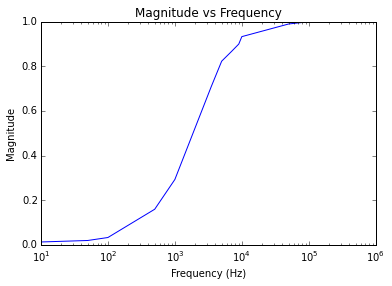

In [11]:
#Record the amplitude of the output sinusoid at each given frequency
Vsrc = 3
f = [10, 50, 100, 500, 1e3, 3.5e3, 5e3, 7e3, 9e3, 10e3, 50e3, 100e3, 500e3]
A = [.04, .06, .1, .48, .88, 2.13, 2.47, 2.6, 2.7, 2.8, 2.97, 3, 3]

Gain = np.array(A)/Vsrc

p = plt.semilogx(f, Gain)
plt.title('Magnitude vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

What do you notice about the shape of this filter compared to the previous filter? What about the corner frequency? 


**<span style="color:red">What is an appropriate name for this type of filter?</span>**

high pass

Identify the corner frequency and collect a few more points around it frequency to fill out the graph.

**<span style="color:red">Has the corner frequency moved? Why or why not?</span>**

No.  R and C didn't change and corner frequency is a function of R and C



<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 2</span>
 <span style="color:green">Explain how changing the capacitor placement changed the filter response.</span>

Great job! You have solved the mystery and learned how to design and characterize a filter. These skills will come in handy for the next lab, Color Organ!